In [44]:
import os
os.environ['OMP_NUM_THREADS'] = '3' # for windows threading issue

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB 

In [45]:
# In this problem, you are required to apply various classification techniques on the benchmark
# dataset heart.csv from the UCI Machine Learning Repository. This dataset contains 14 fields,
# where the last one is the class: presence of heart disease (1) or absence of heart disease.

In [46]:
df = pd.read_csv('data/heart_disease_uci.csv', delimiter=',')

In [47]:
# 1. Data Preprocessing:
# a. Load the heart.csv dataset and handle any missing values by imputing them with the median
# of their respective columns.
# b. Normalize all numerical attributes to a range of [0, 1].

# define the columns
numeric_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']
categorical_cols = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# used to convert categorical values to numerical values
categorical_mapping = {
    'sex': {'Male': 1, 'Female': 0},
    'dataset': {country: idx for idx, country in enumerate(sorted(df['dataset'].unique()))},
    'cp': {'typical angina': 0, 'atypical angina': 1, 'non-anginal pain': 2, 'asymptomatic': 3},
    'fbs': {True: 1, False: 0},
    'restecg': {'normal': 0, 'st-t abnormality': 1, 'lv hypertrophy': 2},
    'exang': {True: 1, False: 0},
    'slope': {'downsloping': 0, 'flat': 1, 'upsloping': 2},
    'thal': {'fixed defect': 0, 'normal': 1, 'reversable defect': 2}
}

In [48]:
# 2. Data Splitting:
# Obtain 200 random splits of the dataset into training (75%) and test (25%) sets.

splits = []
for i in range(200):
    train, test = train_test_split(df, test_size=0.25)
    splits.append((train, test))

In [ ]:
# 3. Classification Techniques:
# For each split, apply the following classification techniques:
# i. Decision Trees
# ii. K-Nearest Neighbors (KNN) with K = 5
# iii. Logistic Regression
# iv. Multinomial Naïve Bayes
# v. Support Vector Machines with polynomial kernel of degree 3.

eval_results = []
for i, (train, test) in enumerate(splits):

    # Creating copies to avoid tampering the original data
    train_processed = train.copy()
    test_processed = test.copy()
    
    # Missing values in numeric columns for both train and test
    # This step is done after splitting to avoid data leakage**
    train_processed[numeric_cols] = train_processed[numeric_cols].fillna(train_processed[numeric_cols].median())
    test_processed[numeric_cols] = test_processed[numeric_cols].fillna(train_processed[numeric_cols].median())
    
    # Encode categorical columns into numerical using the mapping defined above
    for col in categorical_cols:
        if col in categorical_mapping:
            train_processed[col] = train_processed[col].map(categorical_mapping[col])
            test_processed[col] = test_processed[col].map(categorical_mapping[col])
            if train_processed[col].isnull().any() or test_processed[col].isnull().any():
                train_processed[col] = train_processed[col].fillna(-1)
                test_processed[col] = test_processed[col].fillna(-1)
    
    # Separate features and target
    X_train = train_processed[numeric_cols[:-1] + categorical_cols]
    y_train = train_processed['num']

    X_test = test_processed[numeric_cols[:-1] + categorical_cols]
    y_test = test_processed['num']
    
    # Scale numeric columns to [0, 1]
    scaler = MinMaxScaler()
    X_train[numeric_cols[:-1]] = scaler.fit_transform(X_train[numeric_cols[:-1]])
    X_test[numeric_cols[:-1]] = scaler.transform(X_test[numeric_cols[:-1]])

    # Train and evaluate classifiers
    # Defined in a dictionary for easy access
    classifiers = {
        'Decision Trees': DecisionTreeClassifier(),
        'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
        'Logistic Regression': LogisticRegression(),
        'Gaussian Naïve Bayes': GaussianNB(),
        'Support Vector Machines': SVC(kernel='poly', degree=3)
    }

    # Iterate over classifiers
    for name, clf in classifiers.items():

        # Fit and predict
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        # Calculate all metrics
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        acc = accuracy_score(y_test, y_pred)
        
        eval_results.append((i, name, precision, recall, f1, acc))

# Create a DataFrame from the results
eval_results = pd.DataFrame(eval_results, 
                          columns=['split', 'classifier', 'precision', 'recall', 'f1', 'accuracy'])


C:\Users\User\AppData\Local\Temp\ipykernel_13008\554702085.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numeric_cols[:-1]] = scaler.fit_transform(X_train[numeric_cols[:-1]])
C:\Users\User\AppData\Local\Temp\ipykernel_13008\554702085.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[numeric_cols[:-1]] = scaler.transform(X_test[numeric_cols[:-1]])
c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):



Summary of results across all splits:
                        precision        recall            f1        accuracy  \
                             mean    std   mean    std   mean    std     mean   
classifier                                                                      
Decision Trees              0.513  0.033  0.506  0.030  0.507  0.030    0.506   
Gaussian Naïve Bayes        0.554  0.039  0.548  0.073  0.539  0.061    0.548   
K-Nearest Neighbors         0.517  0.037  0.556  0.029  0.529  0.033    0.556   
Logistic Regression         0.507  0.037  0.566  0.028  0.526  0.032    0.566   
Support Vector Machines     0.502  0.038  0.562  0.028  0.522  0.032    0.562   

                                
                           std  
classifier                      
Decision Trees           0.030  
Gaussian Naïve Bayes     0.073  
K-Nearest Neighbors      0.029  
Logistic Regression      0.028  
Support Vector Machines  0.028  


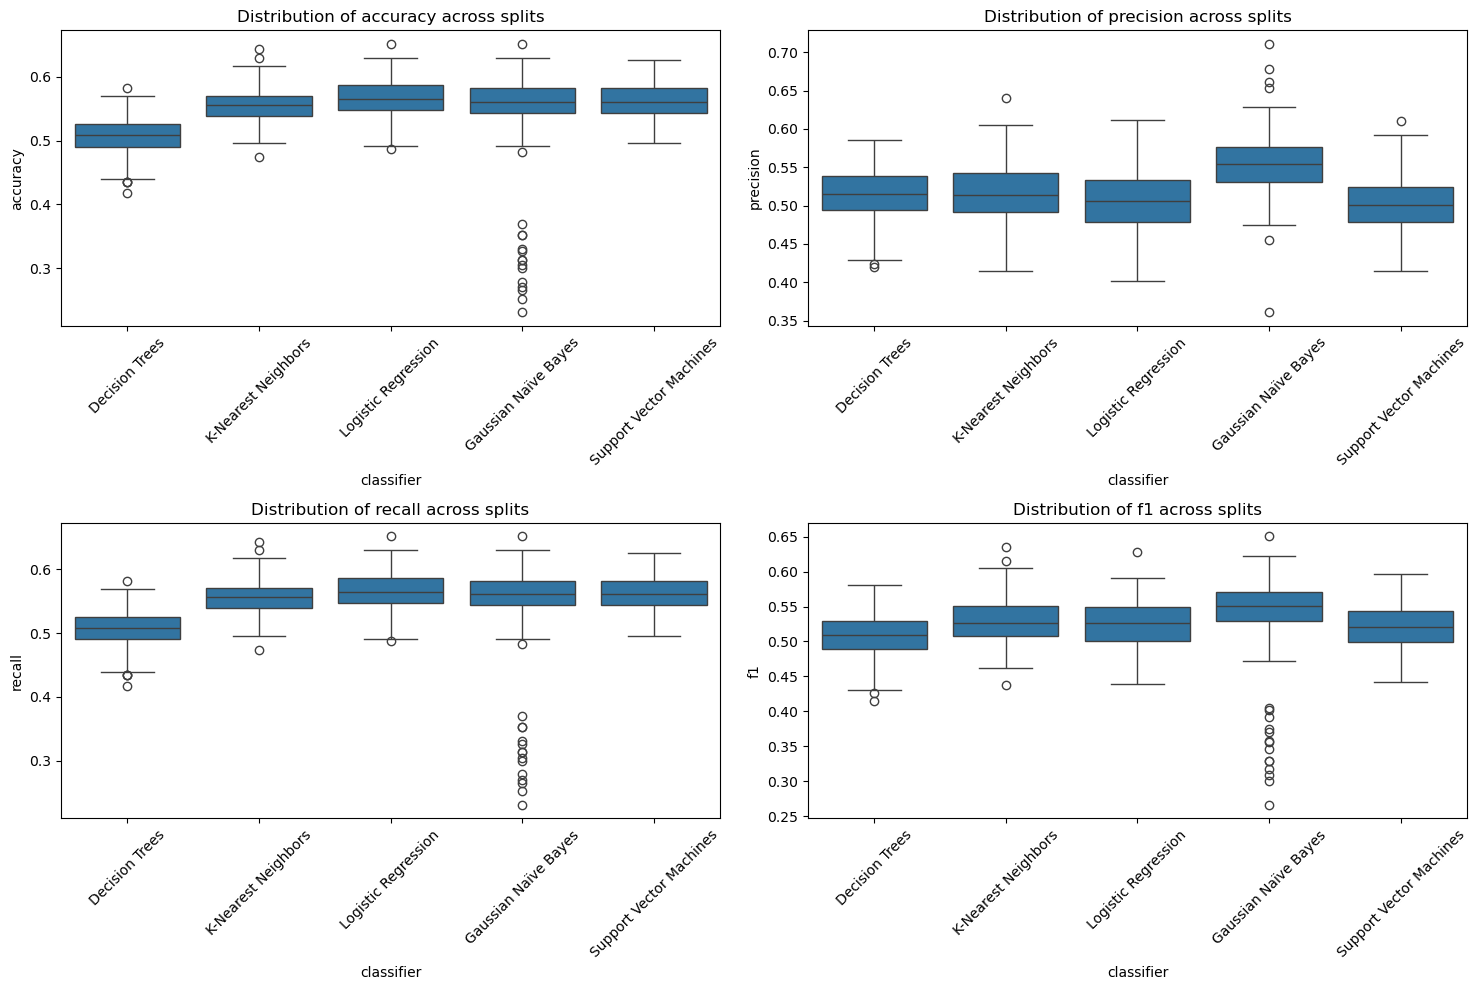

In [ ]:
# 4. Evaluation:
# For each model and each split:
# a. Compute the following evaluation metrics on the test set:
# - Precision
# - Recall
# - F1 Score
# - Accuracy
# b. Store the results of all splits for summarization.

# Summarize the results across all splits by computing the mean and standard deviation of each metric
# Group by classifier and aggregate the metrics
summary = eval_results.groupby('classifier').agg({
    'precision': ['mean', 'std'],
    'recall': ['mean', 'std'],
    'f1': ['mean', 'std'],
    'accuracy': ['mean', 'std']
}).round(3)

print("\nSummary of results across all splits:")
print(summary)

# Plotting the distributions of metrics for each classifier :D
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
metrics = ['accuracy', 'precision', 'recall', 'f1']
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=eval_results, x='classifier', y=metric)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {metric} across splits')
plt.tight_layout()
plt.show()

In [51]:
# 5. Result Summarization:
# Create a summary table showing the average values of precision, recall, F1 score, and accuracy for
# each classification technique across the 200 splits.

summary = eval_results.groupby('classifier').mean().reset_index()

print(summary)

                classifier  split  precision    recall        f1  accuracy
0           Decision Trees   99.5   0.513350  0.506304  0.507194  0.506304
1     Gaussian Naïve Bayes   99.5   0.554070  0.547870  0.538629  0.547870
2      K-Nearest Neighbors   99.5   0.517069  0.555587  0.529446  0.555587
3      Logistic Regression   99.5   0.506529  0.566326  0.525634  0.566326
4  Support Vector Machines   99.5   0.502277  0.562413  0.521702  0.562413
